<a href="https://colab.research.google.com/github/Sanyam8055/EIP-4.0-/blob/master/A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


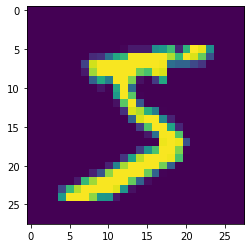

In [101]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [104]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [106]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [55]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))                         
model.add(Convolution2D(32, 1, activation='relu'))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(Convolution2D(32, 1, activation='relu'))


model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()


In [56]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_117 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_120 (Conv2D)          (None, 11, 11, 32)        4128      
_________________________________________________________________
conv2d_121 (Conv2D)          (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_122 (Conv2D)          (None, 7, 7, 128)       

In [85]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy']
              )
keras.optimizers.Adam(lr=0.005)


In [0]:
model.fit(X_train, Y_train, batch_size=512, nb_epoch=10, verbose=1, validation_split=0.5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 30000 samples, validate on 30000 samples
Epoch 1/10
30000/30000 [==============================] - 225s 7ms/step - loss: 0.0197 - acc: 0.9939 - val_loss: 0.0259 - val_acc: 0.9920
Epoch 2/10
30000/30000 [==============================] - 225s 7ms/step - loss: 0.0135 - acc: 0.9955 - val_loss: 0.0265 - val_acc: 0.9924
Epoch 3/10
30000/30000 [==============================] - 225s 7ms/step - loss: 0.0115 - acc: 0.9963 - val_loss: 0.0246 - val_acc: 0.9925
Epoch 4/10
30000/30000 [==============================] - 225s 8ms/step - loss: 0.0073 - acc: 0.9975 - val_loss: 0.0310 - val_acc: 0.9920
Epoch 5/10
30000/30000 [==============================] - 225s 7ms/step - loss: 0.0065 - acc: 0.9977 - val_loss: 0.0277 - val_acc: 0.9929
Epoch 6/10
30000/30000 [==============================] - 225s 8ms/step - loss: 0.0049 - acc: 0.9982 - val_loss: 0.0355 - val_acc: 0.9907
Epoch 7/10
30000/30000 [==============================] - 225s 7ms/step - loss: 0.0050 - acc: 0.9984 - val_loss: 0.0316 - 

In [109]:
model.fit(X_train, Y_train, batch_size=512, nb_epoch=10, verbose=1, validation_split=0.5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 30000 samples, validate on 30000 samples
Epoch 1/10
30000/30000 [==============================] - 221s 7ms/step - loss: 0.0087 - acc: 0.9970 - val_loss: 0.0356 - val_acc: 0.9911
Epoch 2/10
30000/30000 [==============================] - 221s 7ms/step - loss: 0.0038 - acc: 0.9990 - val_loss: 0.0369 - val_acc: 0.9920
Epoch 3/10
30000/30000 [==============================] - 221s 7ms/step - loss: 0.0027 - acc: 0.9991 - val_loss: 0.0396 - val_acc: 0.9916
Epoch 4/10
30000/30000 [==============================] - 220s 7ms/step - loss: 0.0019 - acc: 0.9995 - val_loss: 0.0374 - val_acc: 0.9920
Epoch 5/10
30000/30000 [==============================] - 221s 7ms/step - loss: 4.3647e-04 - acc: 0.9999 - val_loss: 0.0431 - val_acc: 0.9926
Epoch 6/10
30000/30000 [==============================] - 221s 7ms/step - loss: 1.2394e-04 - acc: 1.0000 - val_loss: 0.0427 - val_acc: 0.9928
Epoch 7/10
30000/30000 [==============================] - 221s 7ms/step - loss: 1.9064e-05 - acc: 1.0000 - val_los

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [111]:
print(score)

[0.049763190737543934, 0.9913]
